<a href="https://colab.research.google.com/github/aavella77/fft/blob/main/fft_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fast Fourier Transform (FFT) algorithm Tutorial
By [Alejandro Avella](https://aavella77.github.io/)

July 30, 2022

The Fourier Transform is a mathematical formula that allows to go from the time domain to the frequency domain.  See figure below, where we have a signal that looks random in the time domain, but it is just composed of 3 sine waves in the frequency domain. I have studied this mathematically in my undergrad and master studies, but never studied the FFT algorithm.

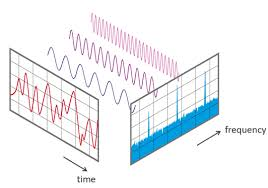

**Figure 1 - Time and Frequency domains (source: Berkeley book)**

I was motivated to study this algorithm when I watched a [video](https://www.youtube.com/watch?v=h7apO7q16V0) that showed the implementation is recursive and can be implemented in about 10 lines of Python code.  There are many things that we take for granted in today's world that are based on the FFT algorithm.  Some of the [applications](https://en.wikipedia.org/wiki/Fast_Fourier_transform#Applications) include Wifi, GPS and celular networks just to name a few of them.

This [Jupyter Notebook](https://jupyter.org/) can be executed in [Google Colab](https://colab.research.google.com/?utm_source=scs-index) and explores the Fast Fourier Algorithm as described the [1965 paper](https://github.com/aavella77/fft/blob/main/FFT-1965-paper-cooley-tukey.pdf) by James Cooley and John Tukey, but the idea actually can be traced back to Gauss’s unpublished work in 1805.



**References:**
* Reducible: The Fast Fourier Transform (FFT): Most Ingenious Algorithm Ever? [video](https://www.youtube.com/watch?v=h7apO7q16V0)
* Reducible: FFT implementation Walkthrough [video](https://www.youtube.com/watch?v=Ty0JcR6Dvis)
* Python Numerical Methods from University of California, Berkeley, Chapter 24 on the Fourier Transform available [here](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.00-Fourier-Transforms.html)
* S. Dasgupta, C.H. Papadimitriou, and U.V. Vazirani, Algorithms, Section 2.6, Fast Fourier Transform ([FFT](https://github.com/aavella77/fft/blob/main/Algorithms-book-chap2-Dasgupta-Papadimitriou-Vazirani.pdf)) 
* 3Blue1Brown Fourier Transform [video](https://www.youtube.com/watch?v=spUNpyF58BY)



**Libraries used:**
*   [Numpy](https://numpy.org/)
*   [Matplotlib](https://matplotlib.org/)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Signal in the time domain:
We study a signal **x** composed of 3 sine waves:

> * Amplitude 3 Volts and frequency 1 Hz
> * Amplitude 1 Volts and frequency 4 Hz
> * Ampliture 0.5 Volts and frequency 7 Hz

This produces an interesting waveform in the time domain, which could represent the voice of a person in the time domain.  We would like to apply the Fast Fourier Transform (FFT) to find the representation in the frequency domain.

We sample this compound signal 32 times in one second (sampling rate = sr), which produces a sampling interval (1 sec / sr) of 0.03125 secs.  We choose a convenient sampling rate which is a power of 2 which helps in the FFT algorithm.  Play with with different sr (e.g 128, 256, ...) and check the number of samples and precision of the graph produced.

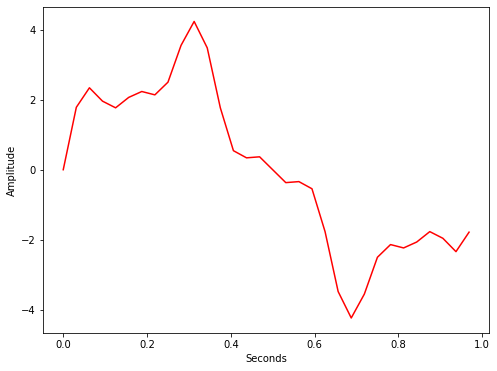

Series in the time domain:

Signal x amplitudes in Volts:
 [ 0.00000000e+00  1.78277039e+00  2.33939201e+00  1.95808267e+00
  1.76776695e+00  2.06508717e+00  2.23357836e+00  2.13770390e+00
  2.50000000e+00  3.55191746e+00  4.23357836e+00  3.47930073e+00
  1.76776695e+00  5.43869112e-01  3.39392013e-01  3.68556825e-01
  3.06161700e-16 -3.68556825e-01 -3.39392013e-01 -5.43869112e-01
 -1.76776695e+00 -3.47930073e+00 -4.23357836e+00 -3.55191746e+00
 -2.50000000e+00 -2.13770390e+00 -2.23357836e+00 -2.06508717e+00
 -1.76776695e+00 -1.95808267e+00 -2.33939201e+00 -1.78277039e+00]

Time samples in seconds:
 [0.      0.03125 0.0625  0.09375 0.125   0.15625 0.1875  0.21875 0.25
 0.28125 0.3125  0.34375 0.375   0.40625 0.4375  0.46875 0.5     0.53125
 0.5625  0.59375 0.625   0.65625 0.6875  0.71875 0.75    0.78125 0.8125
 0.84375 0.875   0.90625 0.9375  0.96875]


In [ ]:
# sampling rate
sr = 32
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')
plt.xlabel('Seconds')

plt.show()
print("Series in the time domain:\n")
print("Signal x amplitudes in Volts:\n", x)
print("\nTime samples in seconds:\n", t)


## Fast Fourier Transform (FFT) algorithm in Python

Some notes regarding the implementation of FFT in Python:
* The input of the FFT function is a list of samples in the time domain **x**.  FFT function returns **X** (note that it is capital letters) that it is the representation in the frequency domain.  **x** is a list of float numbers (real numbers), while the algorithm returns a list of complex numbers **X**.
* FFT is a recursive algorithm.  For a recursive algorithm, the first thing you need to discover is the base case, which in this case when N (the number of samples) is equal to 1. For this case, we just return x with size 1.

* We start finding N as length of the time domain amplitude samples **x**. Initially, is the number of samples, which in our case is 32.

* We use [Python slicing](https://www.pythontutorial.net/advanced-python/python-slicing/), in particular with this format: **seq[start|stop|step]**
> * x[::2] start at zero sample, end at last of the samples, with step 2 (every other samples). Gives even samples from the signal in the time domain (x).
> * x[1::2] Starts at first sample (odd), end at last sample, with step 2 (every other sample). Gives odd samples from the signal in the time domain (x). 
* [Numpy exp](https://numpy.org/doc/stable/reference/generated/numpy.exp.html): Calculate the exponential of all elements in the input array.
* [Numpy pi](https://numpy.org/doc/stable/reference/constants.html): The constant 3.1416 
* [Numpy arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html): For N = 32, np.arange(N) returns a list of 32 numbers starting at zero: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]
* [Numpy concatenate](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html): If a = [1, 2, 3] and b = [4, 5], then np.concatenate(a, b) = [1, 2, 3, 4 5]
* More [Python slicing](https://www.pythontutorial.net/advanced-python/python-slicing/): For example, if N = 4 and factor = [1, 2, 3, 4]

> * factor[:int(N/2)] = [1, 2] (From the beginning to 2 (N/2))
> * factor[int(N/2):] = [3, 4] (From N/2 = 2, to the end)



In [ ]:
def FFT_recursive(x):
    """
    A recursive implementation of 
    the 1D Cooley-Tukey FFT, the 
    input should have a length of 
    power of 2. 
    """
    N = len(x)
    
    if N == 1:
        return x
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = \
          np.exp(-2j*np.pi*np.arange(N)/ N)
        
        X = np.concatenate(\
            [X_even+factor[:int(N/2)]*X_odd,
             X_even+factor[int(N/2):]*X_odd])
        return X

In [ ]:
# We add some prints to follow the recursive execution (same function as above).
def FFT(x):
    """
    A recursive implementation of 
    the 1D Cooley-Tukey FFT, the 
    input should have a length of 
    power of 2. 
    """
    N = len(x)
    
    if N == 1:
        print("\n>>>> N: 1 (base case) returning x: ", x)
        return x
    else:
        print("\nN: ", N)
        print("\nx: ", x)

        print("\nx_even samples in time domain: ", x[::2])
        X_even = FFT(x[::2])
        print("\nX_even in frequency domain after FFT recursive call: ", X_even)
        
        print("\nx_odd samples in time domain: ", x[1::2])
        X_odd = FFT(x[1::2])
        print("\nX_odd in frequency domain after FTT recursive call: ", X_odd)       
        
        factor = \
          np.exp(-2j*np.pi*np.arange(N)/ N)
        print("\nfactor: ", factor)  
        print("\nfor N: ", N)
        print("\nfactor[:int(N/2)]", factor[:int(N/2)])
        print("\nfactor[int(N/2):]", factor[int(N/2):])

        X = np.concatenate(\
            [X_even+factor[:int(N/2)]*X_odd,
             X_even+factor[int(N/2):]*X_odd])

        print("\nX_even+factor[:int(N/2)]*X_odd", X_even+factor[:int(N/2)]*X_odd)
        print("\nX_even+factor[int(N/2):]*X_odd", X_even+factor[int(N/2):]*X_odd)

        print("\n>>>> Returning X: \n", X)
        return X

In [ ]:
X=FFT(x)



N:  32

x:  [ 0.00000000e+00  1.78277039e+00  2.33939201e+00  1.95808267e+00
  1.76776695e+00  2.06508717e+00  2.23357836e+00  2.13770390e+00
  2.50000000e+00  3.55191746e+00  4.23357836e+00  3.47930073e+00
  1.76776695e+00  5.43869112e-01  3.39392013e-01  3.68556825e-01
  3.06161700e-16 -3.68556825e-01 -3.39392013e-01 -5.43869112e-01
 -1.76776695e+00 -3.47930073e+00 -4.23357836e+00 -3.55191746e+00
 -2.50000000e+00 -2.13770390e+00 -2.23357836e+00 -2.06508717e+00
 -1.76776695e+00 -1.95808267e+00 -2.33939201e+00 -1.78277039e+00]

x_even samples in time domain:  [ 0.00000000e+00  2.33939201e+00  1.76776695e+00  2.23357836e+00
  2.50000000e+00  4.23357836e+00  1.76776695e+00  3.39392013e-01
  3.06161700e-16 -3.39392013e-01 -1.76776695e+00 -4.23357836e+00
 -2.50000000e+00 -2.23357836e+00 -1.76776695e+00 -2.33939201e+00]

N:  16

x:  [ 0.00000000e+00  2.33939201e+00  1.76776695e+00  2.23357836e+00
  2.50000000e+00  4.23357836e+00  1.76776695e+00  3.39392013e-01
  3.06161700e-16 -3.39392013e

## Frequency Domain Spectrum Plots
Note that the frequencies obtained are 1, 4 and 7 Hz and the amplitudes are 3, 1 and 0.5 Volts. In the time domain, it may be hard to see this pattern of 3 composing frequencies, but in the time domain the composing signals are very easy to identify. It just beatiful!



X returned by FFT fucntion is: 
 [-1.02610593e-15+0.00000000e+00j -3.24655198e-15-4.80000000e+01j
 -3.49276419e-15-2.74731033e-15j -3.71919307e-15+4.53314086e-16j
 -3.15501296e-15-1.60000000e+01j  3.20905777e-15+2.94134973e-17j
  2.65823334e-15-7.10392001e-16j -2.64103152e-15-8.00000000e+00j
  1.19434012e-15-2.22044605e-15j  3.96989768e-15-5.32907052e-15j
  4.38684722e-15+1.27444698e-15j  2.08744557e-15+3.10871744e-15j
  1.89944050e-15-5.32907052e-15j  5.10538641e-15+5.53179843e-15j
  3.00140095e-15+5.84666169e-15j  6.01870807e-15+0.00000000e+00j
 -3.69064119e-15-1.63155729e-31j  1.19434012e-15+0.00000000e+00j
  3.00140095e-15-5.63428564e-15j  5.84028864e-15-3.31880136e-15j
  1.28587914e-15+8.88178420e-15j  3.01018917e-15-4.33191186e-16j
  4.38684722e-15-9.56603763e-16j  4.35337353e-15+1.15463195e-14j
  1.19434012e-15+2.22044605e-15j -1.00189124e-14+8.00000000e+00j
  2.65823334e-15+1.77807848e-15j  3.87907957e-15+3.30948352e-15j
 -1.05350574e-14+1.60000000e+01j -4.77091604e-15-1.575307

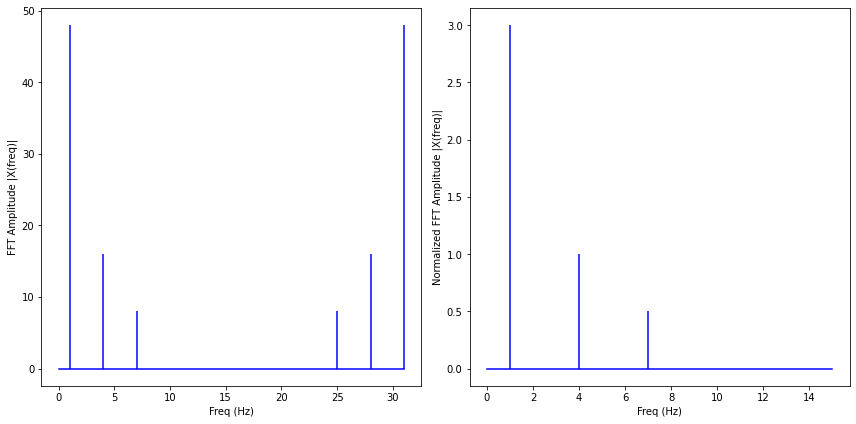

In [ ]:
# calculate the frequency
print("X returned by FFT fucntion is: \n", X)
N = len(X)
print("N:", N)
n = np.arange(N)
print("n:", n)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b", use_line_collection=True)
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b", use_line_collection=True)
plt.xlabel('Freq (Hz)')
plt.ylabel('Normalized FFT Amplitude |X(freq)|')
plt.tight_layout()
plt.show()

# FFT explanation
There are four major clever ideas in FFT (Evaluation).

1. Polynomial multiplication in value represenation: A polynomial can be either represented by its coeficients (Coefficient representation) or by pair value pairs (x, p(x)) (Value representation). All FFT does is to go from coefficient to value representation.
2. Evaluation at +/- pairs, but recursion does not work, unless we expand to the complex domain.
3. Evaluation points at nth roots of unity => FFT
4. Inverse FFT (Interpolation) can be solved with a minor change on w variable.

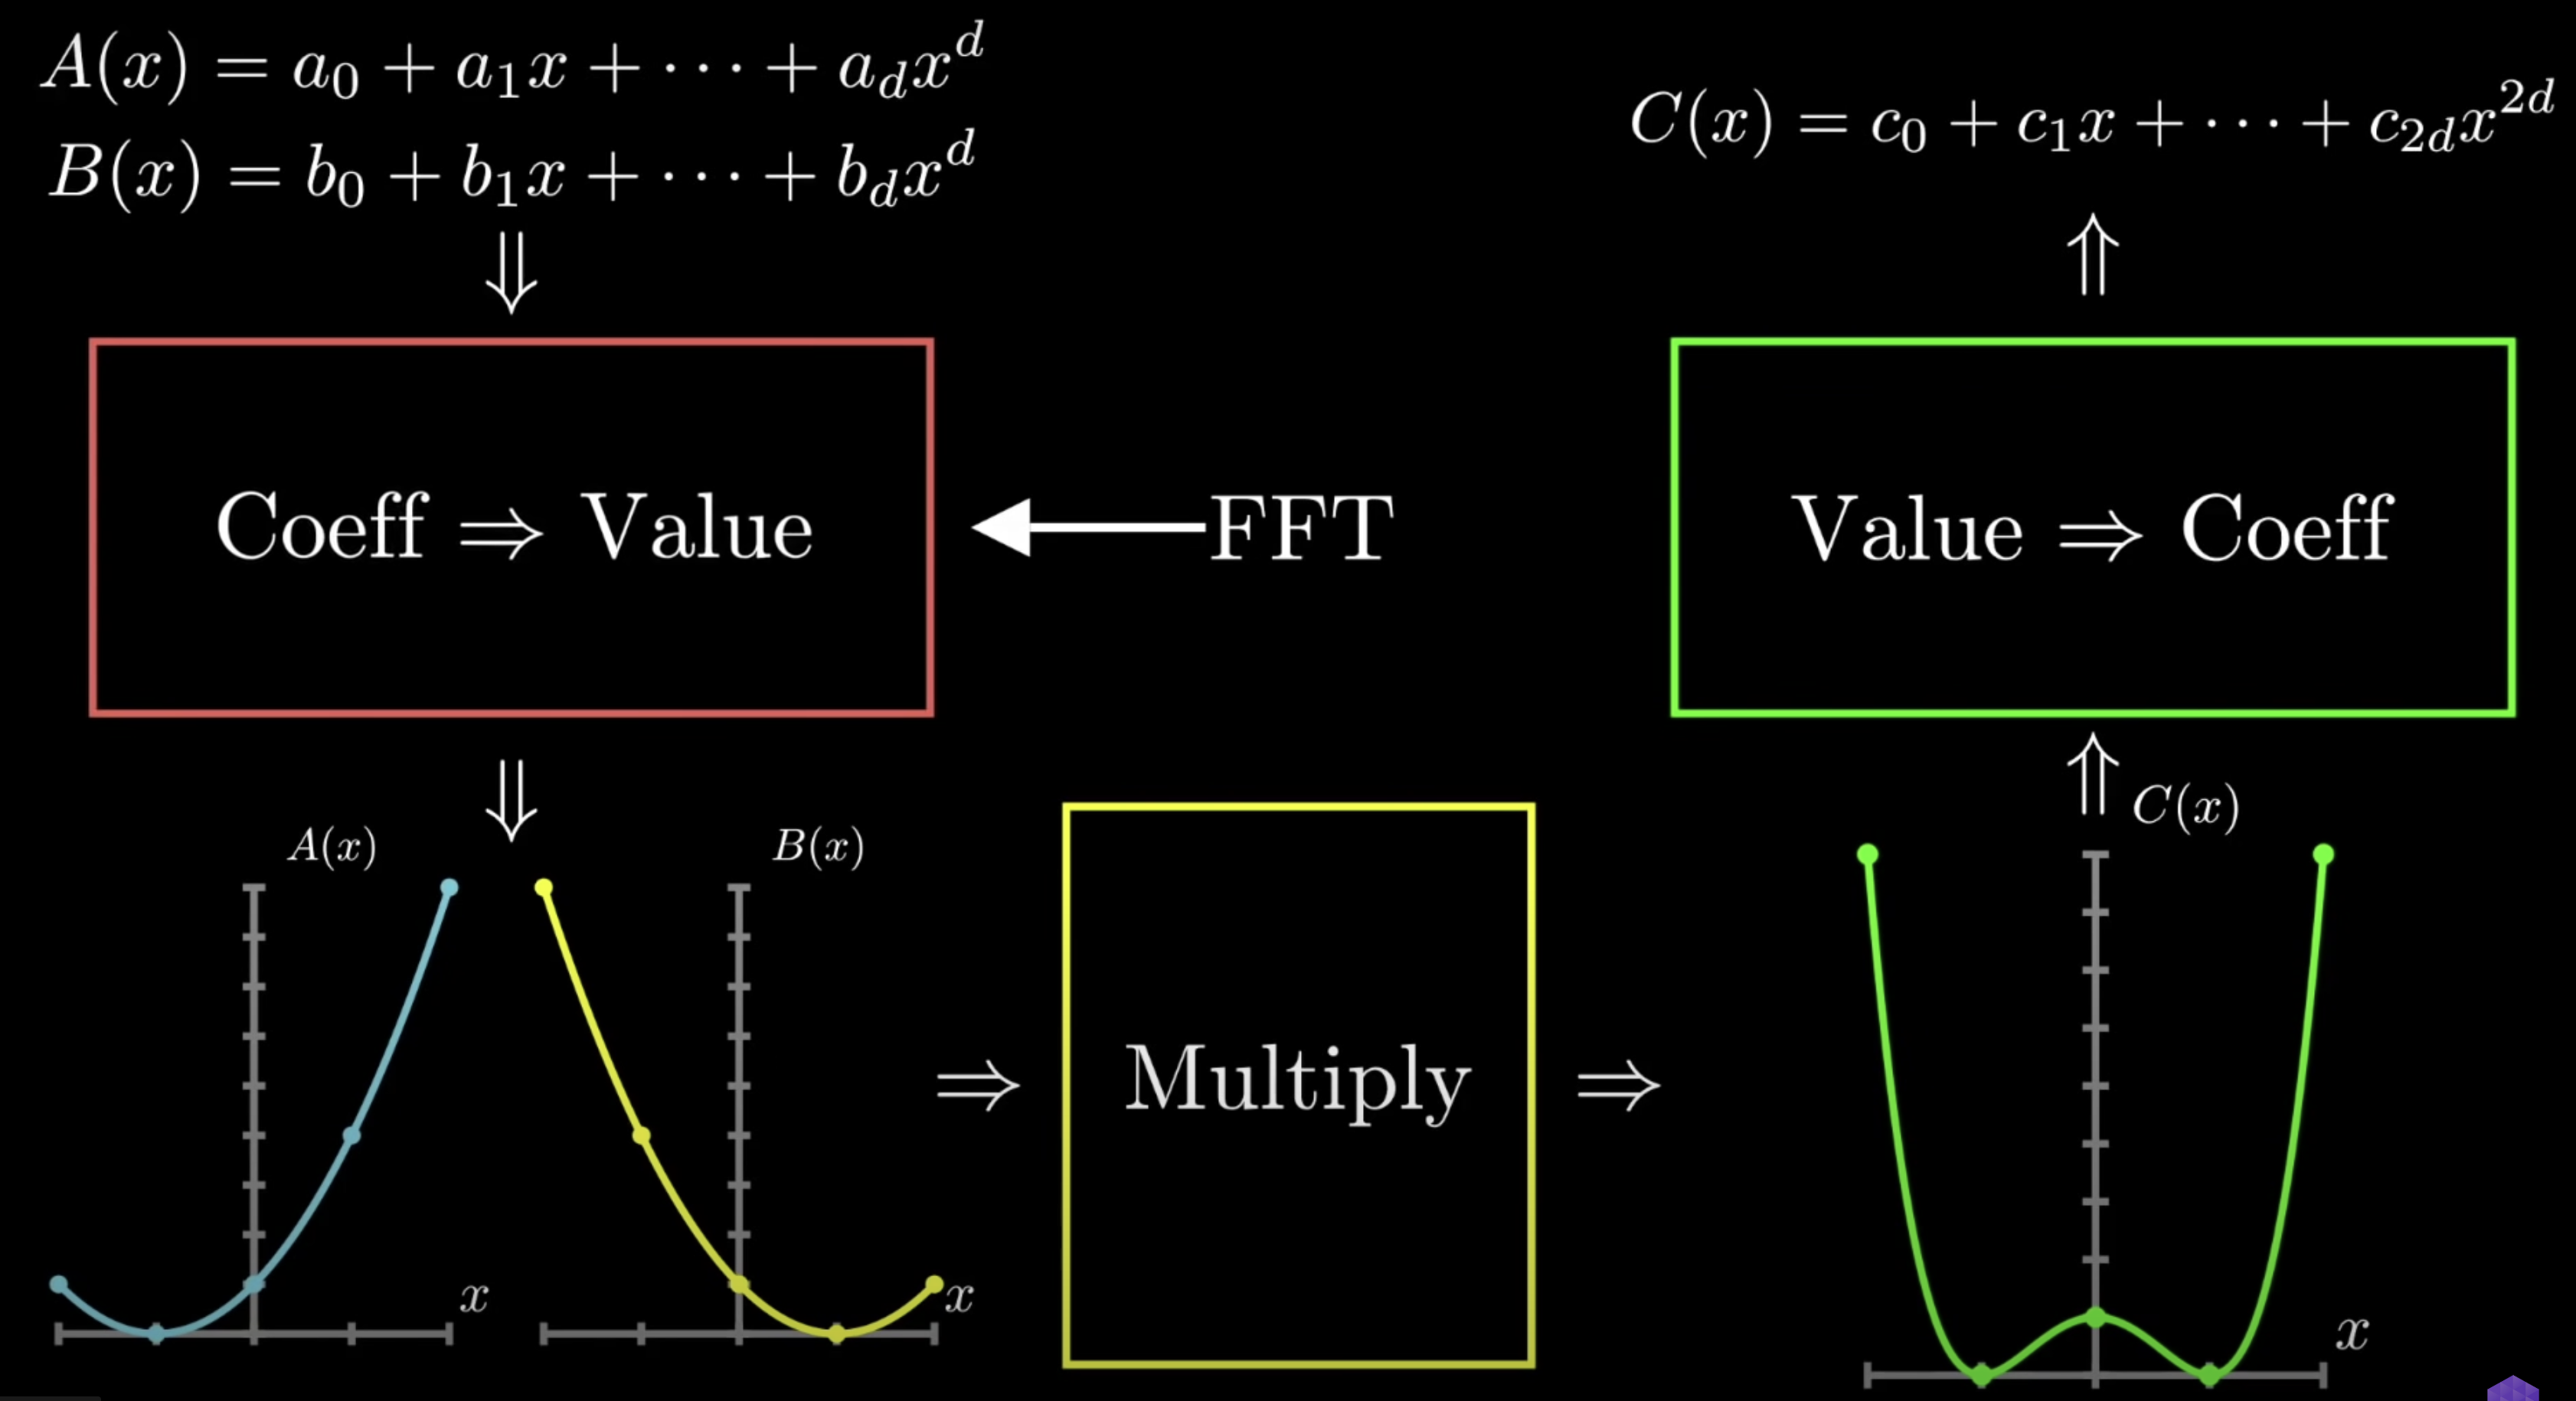

**Figure 2 - FFT is going from Polynomial Coefficient representation to Value representation (source: reducible video)**

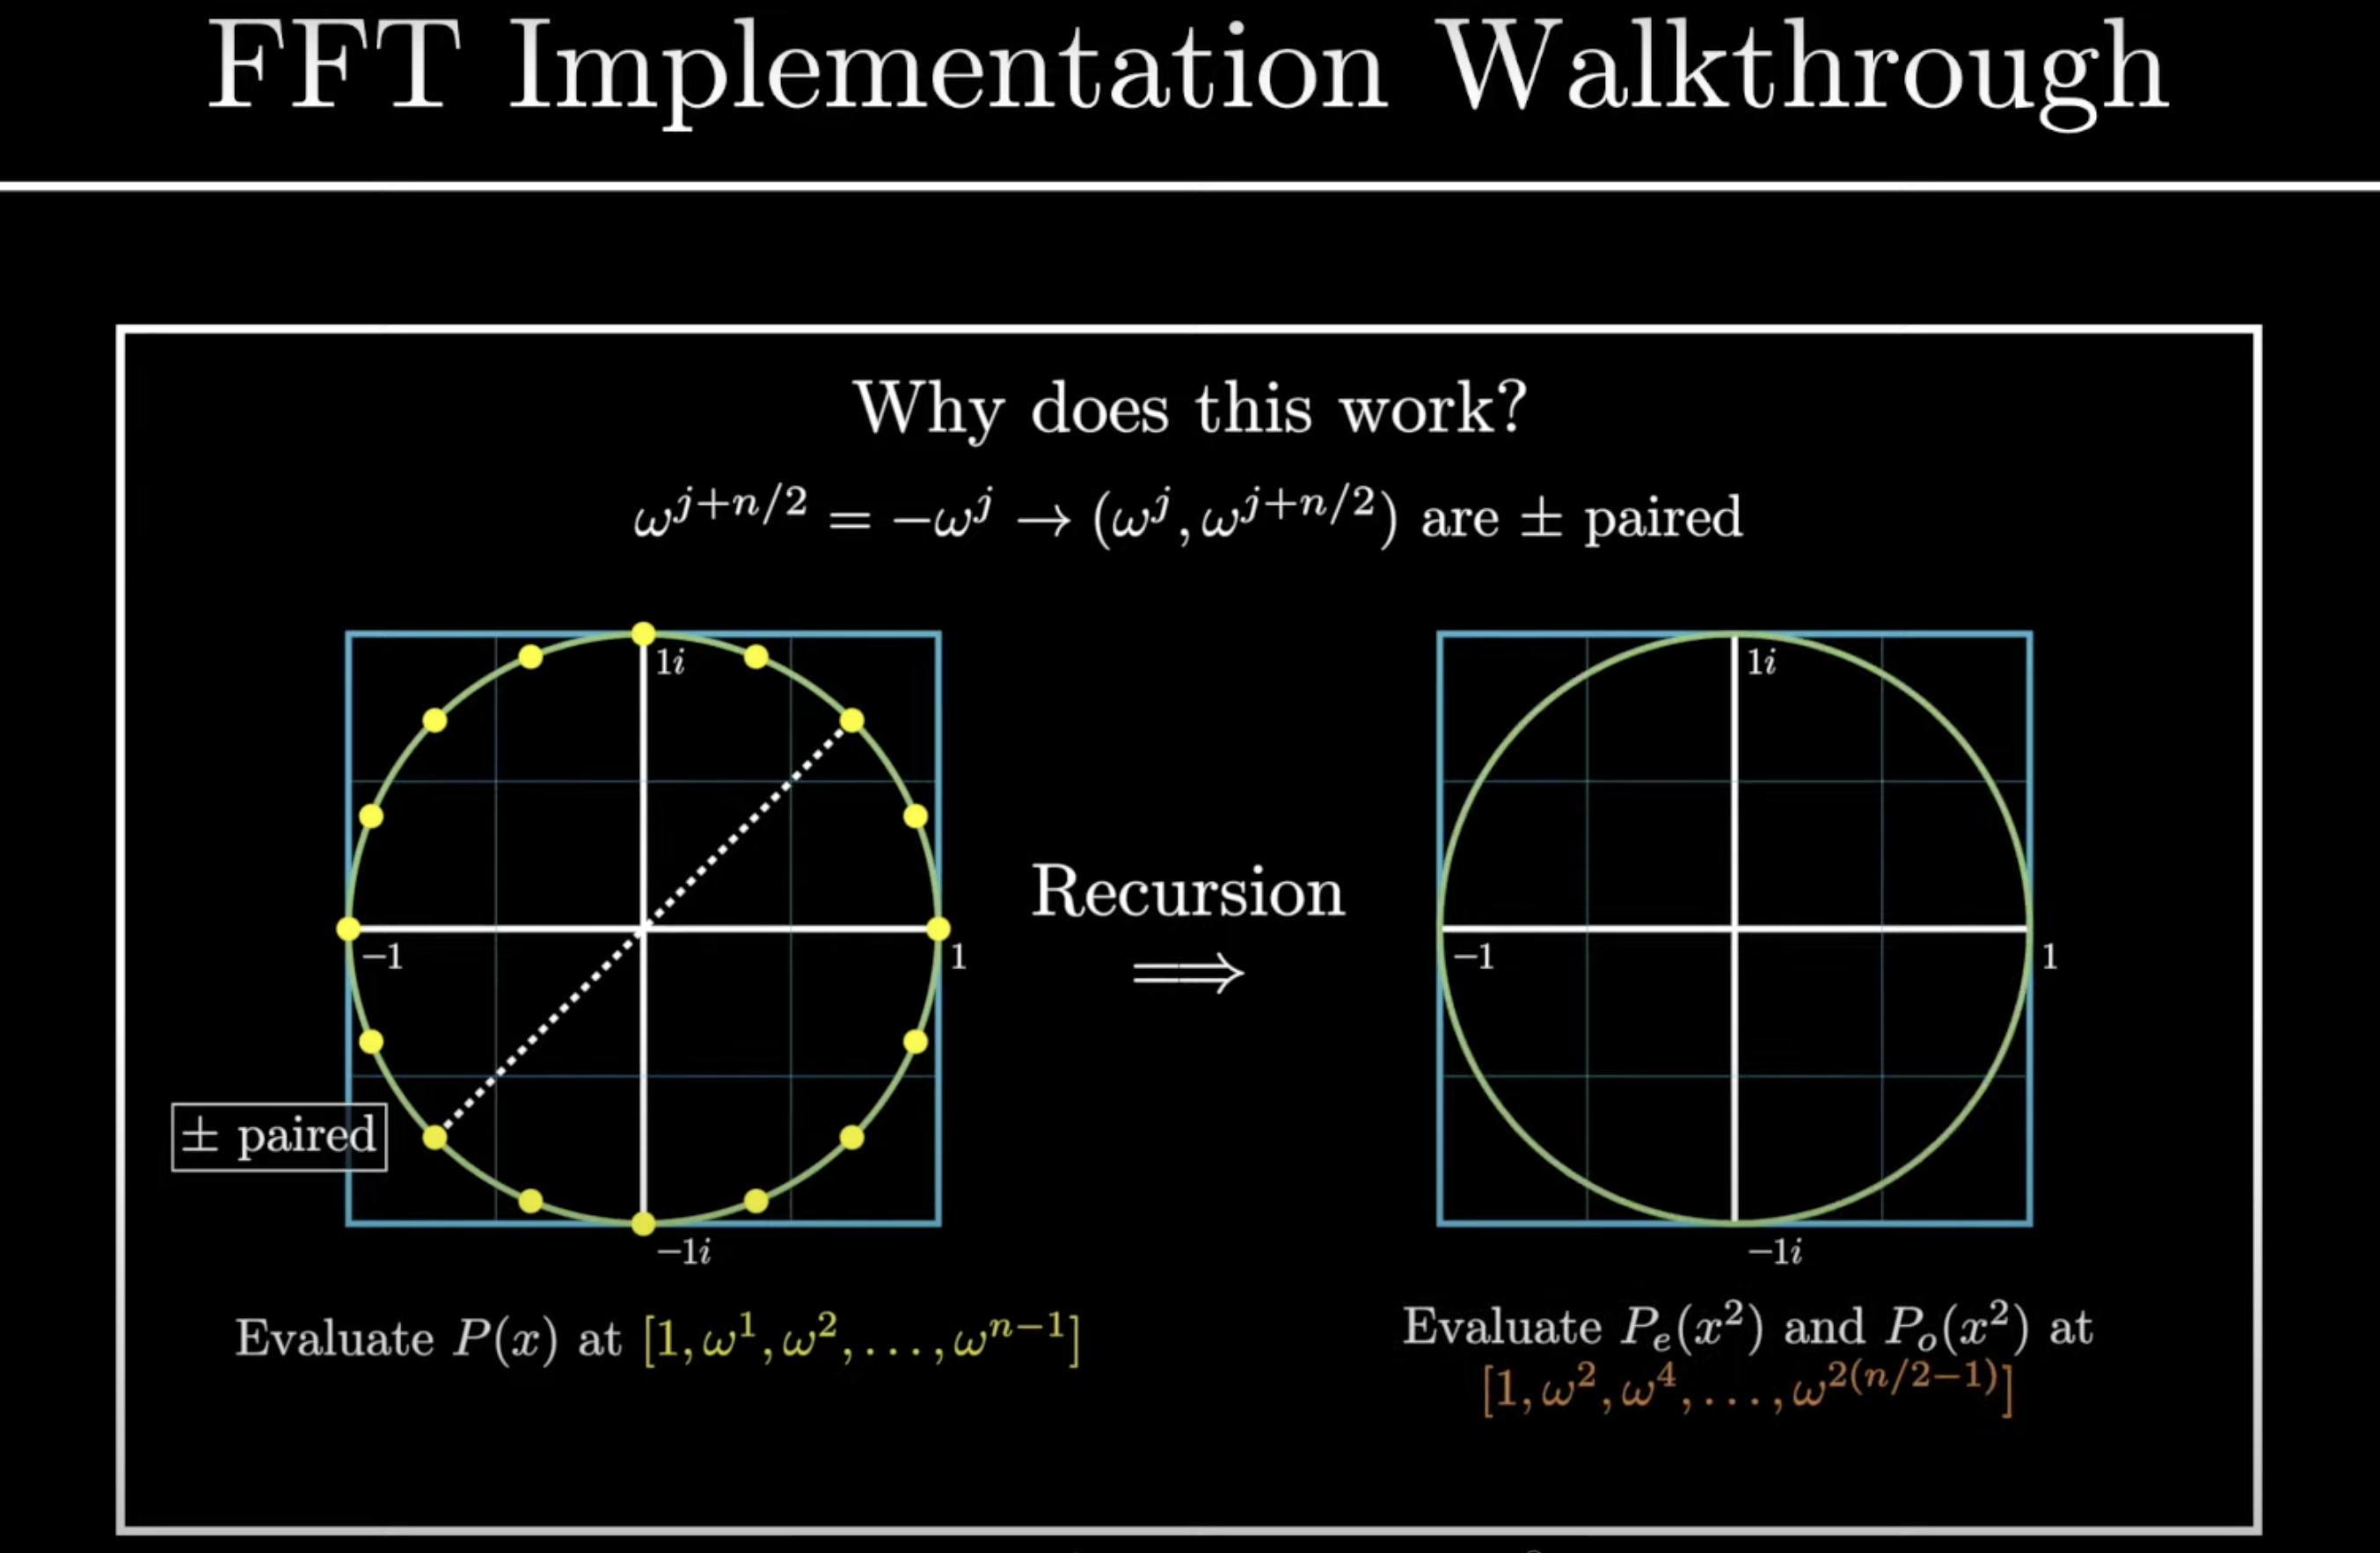

**Figure 3 - Evaluation an Nth points (Source: Reducible video)**